In [16]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset (assuming SMS Spam Collection Dataset)
data = pd.read_csv('/content/SMSSpamCollection',sep='\t',names=["label","message"] )



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
import re

def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    return text

data['message'] = data['message'].apply(clean_text)


In [8]:
data

,label,message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home
5569,ham,pity was in mood for that so any other suggest...
5570,ham,the guy did some bitching but i acted like i d...


In [19]:
# Tokenization, stop words removal, and lemmatization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['message'] = data['message'].apply(preprocess_text)

In [20]:
data

,label,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,ü b going esplanade fr home
5569,ham,pity mood suggestion
5570,ham,guy bitching acted like interested buying some...


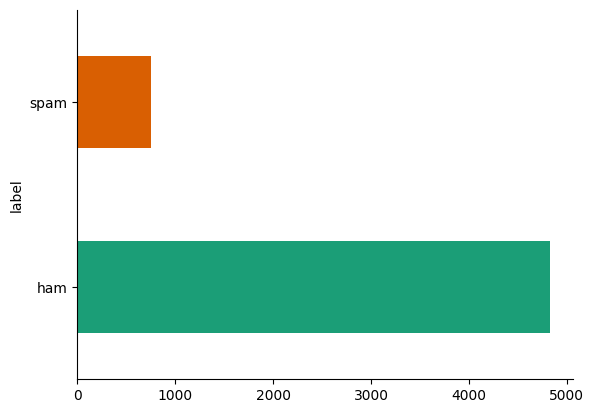

In [25]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Bag of Words

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(data['message'])


# Labels
y = data['label']



<5572x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 44145 stored elements in Compressed Sparse Row format>

In [28]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000,
    formatter=dict(float=lambda x: "%.3g" % x))
X_bow.toarray()



array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0

In [30]:
bow_vectorizer.vocabulary_

{'go': 1641,
 'point': 2809,
 'crazy': 1070,
 'available': 590,
 'bugis': 800,
 'great': 1677,
 'world': 4848,
 'la': 2043,
 'buffet': 799,
 'cine': 938,
 'got': 1662,
 'wat': 4711,
 'ok': 2536,
 'lar': 2055,
 'joking': 1975,
 'wif': 4773,
 'oni': 2545,
 'free': 1542,
 'entry': 1352,
 'wkly': 4821,
 'comp': 996,
 'win': 4783,
 'fa': 1421,
 'cup': 1091,
 'final': 1479,
 'tkts': 4215,
 '21st': 170,
 'may': 2265,
 '2005': 165,
 'text': 4090,
 '87121': 353,
 'receive': 3164,
 'question': 3062,
 'std': 3760,
 'txt': 4395,
 'rate': 3113,
 'apply': 536,
 '08452810075over18': 41,
 'dun': 1288,
 'say': 3420,
 'early': 1294,
 'hor': 1799,
 'already': 485,
 'nah': 2423,
 'think': 4143,
 'usf': 4532,
 'life': 2101,
 'around': 556,
 'though': 4160,
 'freemsg': 1546,
 'hey': 1761,
 'darling': 1118,
 'week': 4739,
 'word': 4841,
 'back': 611,
 'like': 2107,
 'fun': 1573,
 'still': 3782,
 'tb': 4033,
 'xxx': 4909,
 'send': 3493,
 '50': 265,
 'rcv': 3124,
 'even': 1375,
 'brother': 785,
 'speak': 3682,

In [31]:
from sklearn.model_selection import train_test_split

# Split for Bag of Words
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Model for Bag of Words
model_bow = MultinomialNB()
model_bow.fit(X_train_bow, y_train)
y_pred_bow = model_bow.predict(X_test_bow)


# Evaluate Bag of Words Model
accuracy_bow = accuracy_score(y_test, y_pred_bow)
precision_bow = precision_score(y_test, y_pred_bow, pos_label='spam')
recall_bow = recall_score(y_test, y_pred_bow, pos_label='spam')
f1_bow = f1_score(y_test, y_pred_bow, pos_label='spam')

print("Bag of Words Model")
print(f'Accuracy: {accuracy_bow}')
print(f'Precision: {precision_bow}')
print(f'Recall: {recall_bow}')
print(f'F1 Score: {f1_bow}')





Bag of Words Model
Accuracy: 0.9847533632286996
Precision: 0.9342105263157895
Recall: 0.9530201342281879
F1 Score: 0.9435215946843853


In [34]:
def predict_spam_or_ham(message, model, vectorizer):
    message_cleaned = clean_text(message)
    message_processed = preprocess_text(message_cleaned)
    message_transformed = vectorizer.transform([message_processed])
    prediction = model.predict(message_transformed)
    return prediction[0]

# Example usage
new_message = "Congratulations! You've won a free ticket to the Bahamas. Click here to claim now."

prediction = predict_spam_or_ham(new_message, model_bow, bow_vectorizer) # Use the Bag of Words model instead
print(f"The message is: {prediction}")

The message is: spam


# TF-IDF

In [35]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['message'])

# Labels
y = data['label']

In [36]:
# Split for TF-IDF
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [41]:
X_train_tfidf.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0

In [37]:
# Model for TF-IDF
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

In [38]:
# Evaluate TF-IDF Model
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf, pos_label='spam')
recall_tfidf = recall_score(y_test, y_pred_tfidf, pos_label='spam')
f1_tfidf = f1_score(y_test, y_pred_tfidf, pos_label='spam')

print("\nTF-IDF Model")
print(f'Accuracy: {accuracy_tfidf}')
print(f'Precision: {precision_tfidf}')
print(f'Recall: {recall_tfidf}')
print(f'F1 Score: {f1_tfidf}')


TF-IDF Model
Accuracy: 0.97847533632287
Precision: 0.9921259842519685
Recall: 0.8456375838926175
F1 Score: 0.9130434782608696


In [39]:
def predict_spam_or_ham(message, model, vectorizer):
    message_cleaned = clean_text(message)
    message_processed = preprocess_text(message_cleaned)
    message_transformed = vectorizer.transform([message_processed])
    prediction = model.predict(message_transformed)
    return prediction[0]

# Example usage
new_message = "Congratulations! You've won a free ticket to the Bahamas. Click here to claim now."
prediction = predict_spam_or_ham(new_message, model_tfidf, tfidf_vectorizer)
print(f"The message is: {prediction}")

The message is: spam
